In [2]:
import numpy as np
import pandas as pd

In [3]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import skew

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import plotly
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
#plotly.offline.init_notebook_mode(connected=True)

In [6]:
from sklearn.neighbors import KNeighborsRegressor

__Data Processing__

In [7]:
#load train data
train_df=pd.read_csv('Data/train.csv')
test_df=pd.read_csv('Data/test.csv')

In [11]:
target = train_df['SalePrice']
test_id = test_df['Id']
test_df = test_df.drop(['Id'],axis = 1)
train_df = train_df.drop(['SalePrice','Id'], axis = 1)

In [12]:
train_test = pd.concat([train_df,test_df], axis=0, sort=False)

In [26]:
train_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [19]:
nan = pd.DataFrame(train_test.isna().sum(), columns = ['Total Missing Values'])

In [39]:
#Keeping values that are under 15%
nan['Feature'] = nan.index
nan['Perc(%)'] = (nan['Total Missing Values']/2919)*100
nan = nan[nan['Total Missing Values'] > 0]
nan = nan.sort_values(by = ['Total Missing Values'])
nan = nan[nan['Total Missing Values'] > 0]
nan = nan.sort_values(by = ['Total Missing Values'])
nan['Usability'] = np.where(nan['Perc(%)'] > 15, 'Discard', 'Keep')
nan

,Total Missing Values,Feature,Perc(%),Usability
TotalBsmtSF,1,TotalBsmtSF,0.034258,Keep
GarageArea,1,GarageArea,0.034258,Keep
GarageCars,1,GarageCars,0.034258,Keep
KitchenQual,1,KitchenQual,0.034258,Keep
Electrical,1,Electrical,0.034258,Keep
BsmtUnfSF,1,BsmtUnfSF,0.034258,Keep
BsmtFinSF2,1,BsmtFinSF2,0.034258,Keep
BsmtFinSF1,1,BsmtFinSF1,0.034258,Keep
SaleType,1,SaleType,0.034258,Keep
Exterior1st,1,Exterior1st,0.034258,Keep


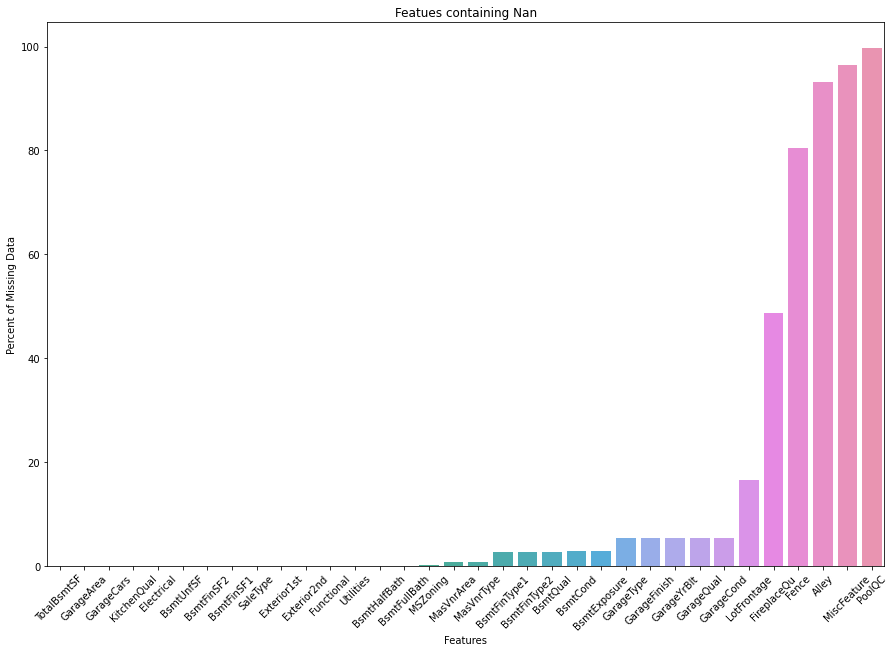

In [42]:
plt.figure(figsize = (15,10))
sns.barplot(x = nan['Feature'], y =nan['Perc(%)'])
plt.xticks(rotation=45)
plt.title('Featues containing Nan')
plt.xlabel('Features')
plt.ylabel('Percent of Missing Data')
plt.show()